# Overfitting

$$\bf{f(x)=x^2+\eta}$$

$$\bf{A\beta=f(x_j)}$$

$\bf{A}$ contains polynomial models up to degree $\bf{p − 1}$ with each row representing a measurement,
$\bf{\beta_k}$ are the coefficients for each polynomial,
$\bf{f(x_j)}$ contains the outcomes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib import rcParams
rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [10,10]

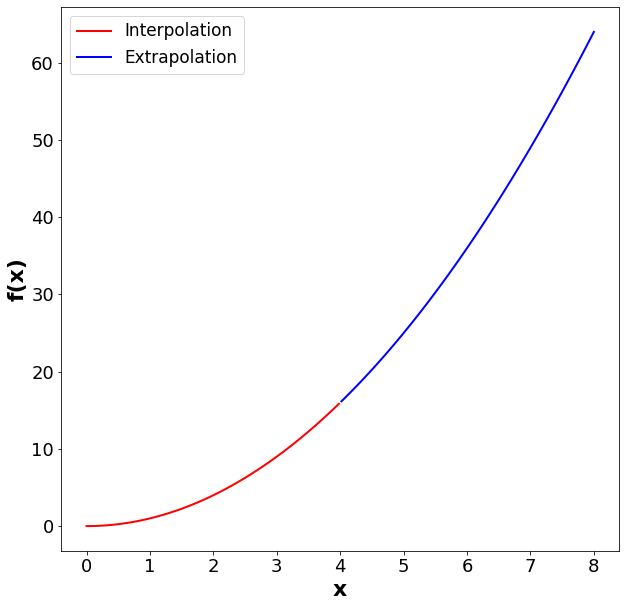

In [2]:
n = 200
L = 8
x = np.linspace(0,L,n)
x1 = x[:100]    # Training part
x2 = x[100:200] # Testing part
n1 = len(x1)
n2 = len(x2)
ftrain = np.power(x1,2) # Train parabola x = [0,4]
ftest = np.power(x2,2)  # Test parabola x = [4,8]

plt.plot(x1,ftrain,color='r',linewidth=2,label='Interpolation')
plt.plot(x2,ftest,color='b',linewidth=2, label='Extrapolation')
plt.legend(fontsize=17)
plt.xlabel('x',fontweight='bold', fontsize=22)
plt.ylabel('f(x)',fontweight='bold', fontsize=22)
plt.show()

In [3]:
M = 30 # number of model terms
Eni = np.zeros((100,M))#error matrix
Ene = np.zeros((100,M))
fnaidata = np.zeros((100,M))
fnaedata = np.zeros((100,M))
for jj in range(M):
    phi_i = np.zeros((n1,jj+1))
    phi_e = np.zeros((n2,jj+1))
    for j in range(jj): #creating the matrix of polynomial models
        phi_i[:,j] = np.power(x1,j) # interpolation: each column of phi has the data from x1 raised to the jth power
        phi_e[:,j] = np.power(x2,j) # extrapolation key
    
    f = np.power(x,2)
    for j in range(100):
        fni = np.power(x1,2) + 0.1*np.random.randn(n1) # interpolation
        fne = np.power(x2,2) + 0.1*np.random.randn(n2) # extrapolation
        
        ani = np.linalg.pinv(phi_i) @ fni #coefficients
        fnai = phi_i @ ani #new approximations
        fnaidata[:,jj]=fnai
        Eni[j,jj] = np.linalg.norm(ftrain-fnai,ord=2)/np.linalg.norm(ftrain,ord=2)
        
        fnae = phi_e @ ani # use loadings from x in [0,4]
        fnaedata[:,jj]=fnae
        Ene[j,jj] = np.linalg.norm(ftest-fnae,ord=2)/np.linalg.norm(ftest,ord=2)
        
              

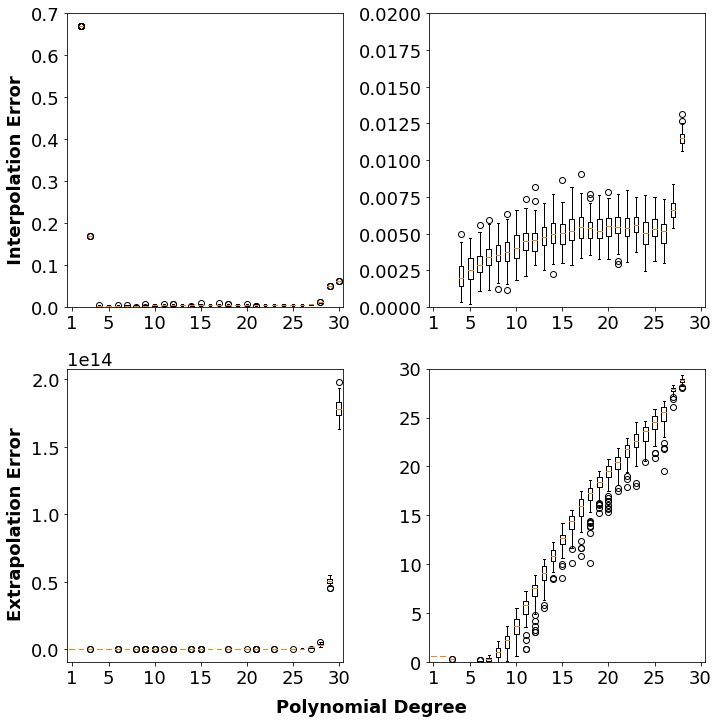

In [4]:
fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)

axs[0].boxplot(Eni)
axs[0].set_ylim(0,0.7)
axs[1].boxplot(Eni)
axs[1].set_ylim(0,0.02)
axs[2].boxplot(Ene)
axs[3].boxplot(np.log(Ene+1))
axs[3].set_ylim(0,30)

for ax in axs:
    ax.set_xticks((1,5,10,15,20,25,30))
    ax.set_xticklabels((1,5,10,15,20,25,30))

fig.text(0.5, 0.00004, 'Polynomial Degree', ha='center', va='center',fontweight='bold',fontsize=18)
fig.text(0.006, 0.5, 'Extrapolation Error                          Interpolation Error', ha='center', va='center', rotation='vertical',fontweight='bold',fontsize=18)
plt.tight_layout()
plt.show()

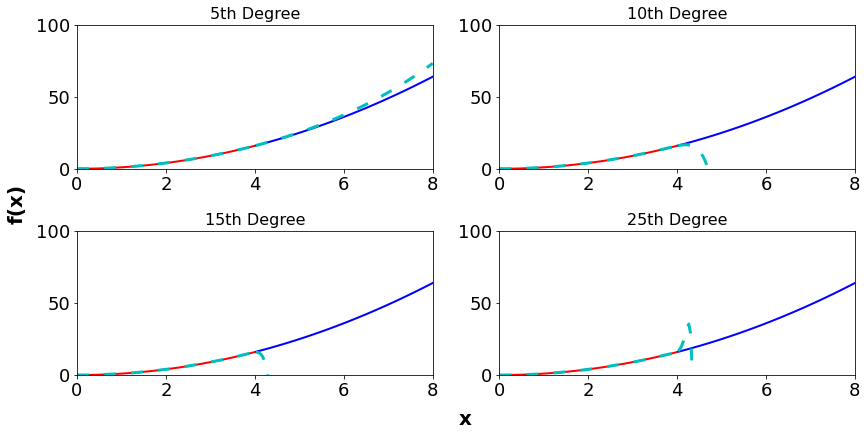

In [7]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax.set_title('5th Degree',fontsize=16)
ax.plot(x1,ftrain,'r',linewidth=2)
ax.plot(x2,ftest,'b',linewidth=2)
ax.plot(x1,fnaidata[:,5],'c--',linestyle='--', dashes=(4, 5), linewidth=3)
ax.plot(x2,fnaedata[:,5],'c--',linestyle='--', dashes=(4, 5), linewidth=3)
ax.set_xlim([0,8])
ax.set_ylim([0,100])

ax2.set_title('10th Degree',fontsize=16)
ax2.plot(x1,ftrain,'r',linewidth=2)
ax2.plot(x2,ftest,'b',linewidth=2)
ax2.plot(x1,fnaidata[:,10],'c--',linestyle='--', dashes=(4, 5), linewidth=3)
ax2.plot(x2,fnaedata[:,10],'c--',linestyle='--', dashes=(4, 5), linewidth=3)
ax2.set_xlim([0,8])
ax2.set_ylim([0,100])

ax3.set_title('15th Degree',fontsize=16)
ax3.plot(x1,ftrain,'r',linewidth=2)
ax3.plot(x2,ftest,'b',linewidth=2)
ax3.plot(x1,fnaidata[:,15],'c--',linestyle='--', dashes=(4, 5), linewidth=3)
ax3.plot(x2,fnaedata[:,15],'c--',linestyle='--', dashes=(4, 5), linewidth=3)
ax3.set_xlim([0,8])
ax3.set_ylim([0,100])

ax4.set_title('25th Degree',fontsize=16)
ax4.plot(x1,ftrain,'r',linewidth=2)
ax4.plot(x2,ftest,'b',linewidth=2)
ax4.plot(x1,fnaidata[:,25],'c--',linestyle='--', dashes=(4, 5), linewidth=3)
ax4.plot(x2,fnaedata[:,25],'c--',linestyle='--', dashes=(4, 5), linewidth=3)
ax4.set_xlim([0,8])
ax4.set_ylim([0,100])

fig.text(0.52, 0.0004,'x', ha='center', va='center', fontweight='bold',fontsize=20)
fig.text(0.0006, 0.5,'f(x)', ha='center', va='center', rotation='vertical', fontweight='bold',fontsize=20)
plt.tight_layout()
plt.show()